In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

from sklearn.cluster import AgglomerativeClustering

from scipy.cluster.hierarchy import dendrogram
from scipy.cluster import hierarchy

## Import Dataset

In [2]:
df_pen = sns.load_dataset('penguins')

In [3]:
df_pen = df_pen.dropna()

In [4]:
df_pen = df_pen.sample(frac=1).reset_index(drop=True)

In [5]:
# X = df_pen.drop(['species'], axis = 1)
X = df_pen.copy(deep = True)

## Data Pre-processing

In [6]:
X = pd.get_dummies(X, drop_first=True)

In [7]:
escalador = StandardScaler()
scaled_X = escalador.fit_transform(X)


In [8]:
scaled_df = pd.DataFrame(scaled_X, columns = X.columns)

## Clustering

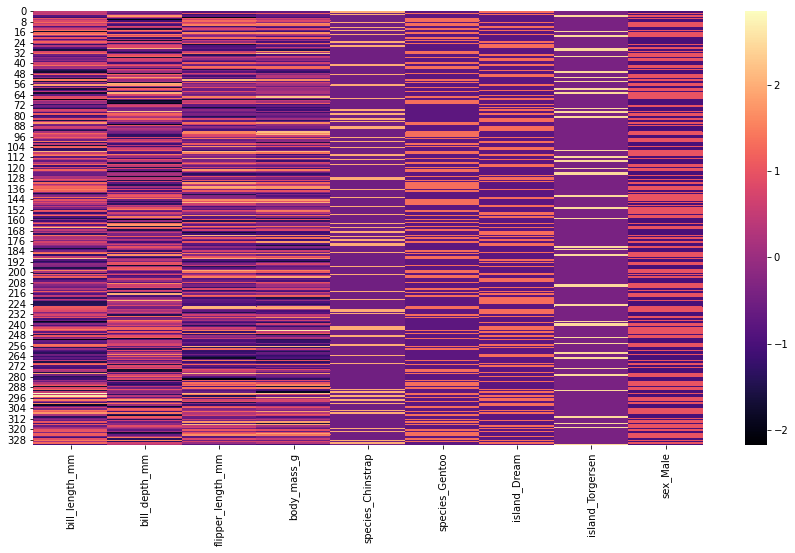

In [9]:
plt.figure(figsize=(15,8))
sns.heatmap(scaled_df,cmap='magma');

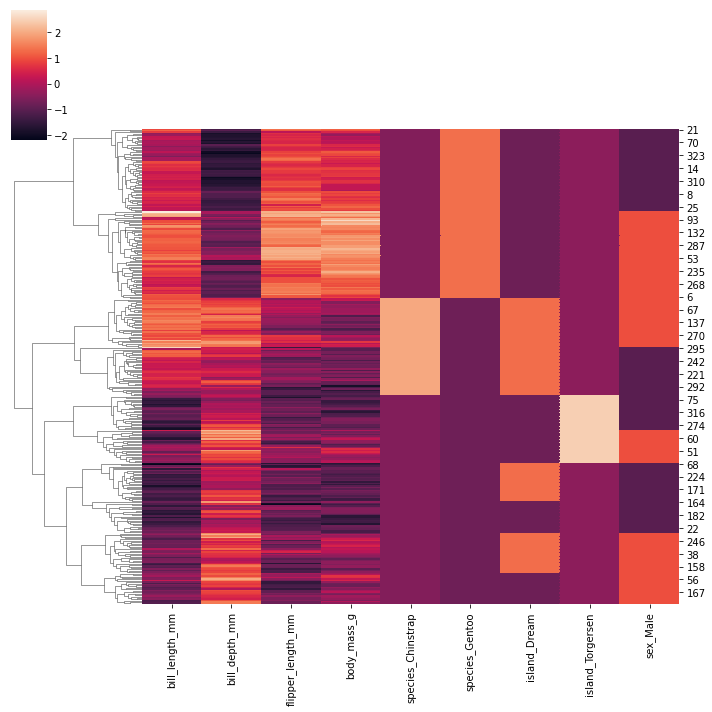

In [10]:
sns.clustermap(scaled_df,col_cluster=False);

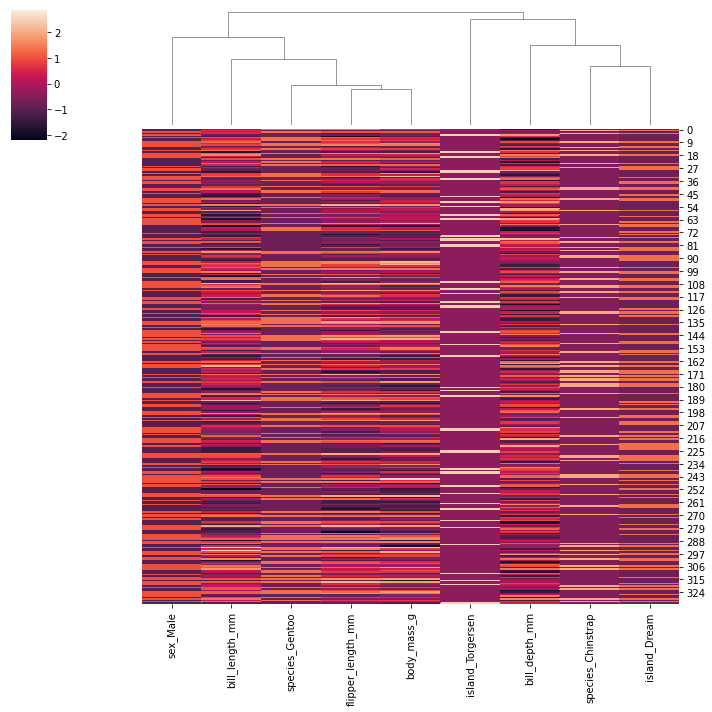

In [11]:
sns.clustermap(scaled_df,row_cluster=False)

## Exploring Number of Clusters with Dendrograms

Make sure to read the documentation online!
https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html

#### Assuming every point starts as its own cluster

In [12]:
model = AgglomerativeClustering(n_clusters=None,distance_threshold=0)

In [13]:
cluster_labels = model.fit_predict(scaled_df)

In [14]:
cluster_labels

array([311, 176, 262, 302, 246, 249, 219, 314, 305, 221, 237, 236, 205,
       299, 307, 286, 321, 322, 329, 193, 200, 207, 324, 326, 196, 232,
       181, 292, 222, 168, 315, 248, 280, 226, 171, 172, 308, 213, 306,
       255, 297, 211, 296, 185, 285, 174, 241, 282, 317, 327, 203, 242,
       303, 300, 229, 325, 206, 295, 247, 291, 199, 238, 253, 267, 290,
       177, 162, 274, 250, 313, 323, 189, 284, 145, 161, 293, 281, 215,
       318, 234, 263, 102,  99, 197, 256, 316, 147, 269, 272, 118, 175,
       273, 188, 201, 287, 251, 264, 220, 276, 319, 204, 202, 182, 124,
       254, 244, 283, 178, 265, 294, 288, 186, 198, 100, 252, 187, 157,
       240, 143, 209, 328, 270, 330, 142, 179, 166, 180, 320, 164, 268,
       160, 195, 271, 279, 301, 125,  98, 275, 184, 216,  97, 312, 239,
       224, 159, 331, 146, 140, 243, 218, 235,  89, 227, 134, 137, 298,
       148, 223, 233, 214, 259,  90, 167, 127,  93, 109,  79,  49, 163,
       277, 119, 278, 212, 170, 110, 133, 111,  73, 231, 169, 33

### Linkage Model

In [15]:
linkage_matrix = hierarchy.linkage(model.children_)

In [16]:
linkage_matrix

array([[317.        , 319.        ,   1.41421356,   2.        ],
       [  9.        , 208.        ,   2.23606798,   2.        ],
       [ 29.        ,  33.        ,   2.23606798,   2.        ],
       ...,
       [294.        , 659.        ,  47.63402146, 330.        ],
       [279.        , 660.        ,  57.48912941, 331.        ],
       [314.        , 661.        ,  81.0246876 , 332.        ]])

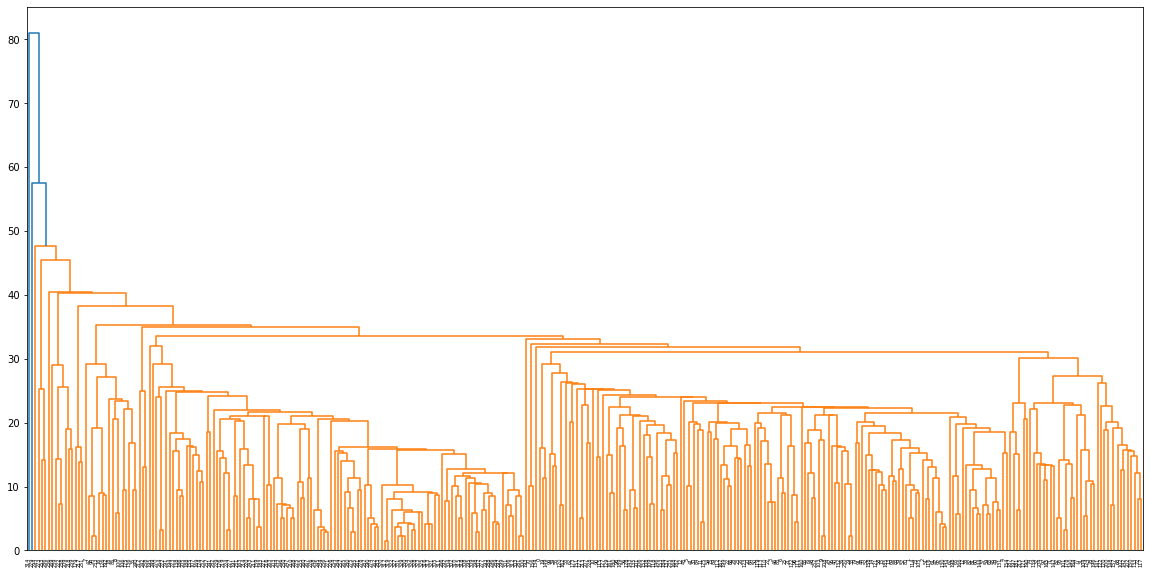

In [17]:
plt.figure(figsize=(20,10))
# Warning! This plot will take awhile!!
dn = hierarchy.dendrogram(linkage_matrix)

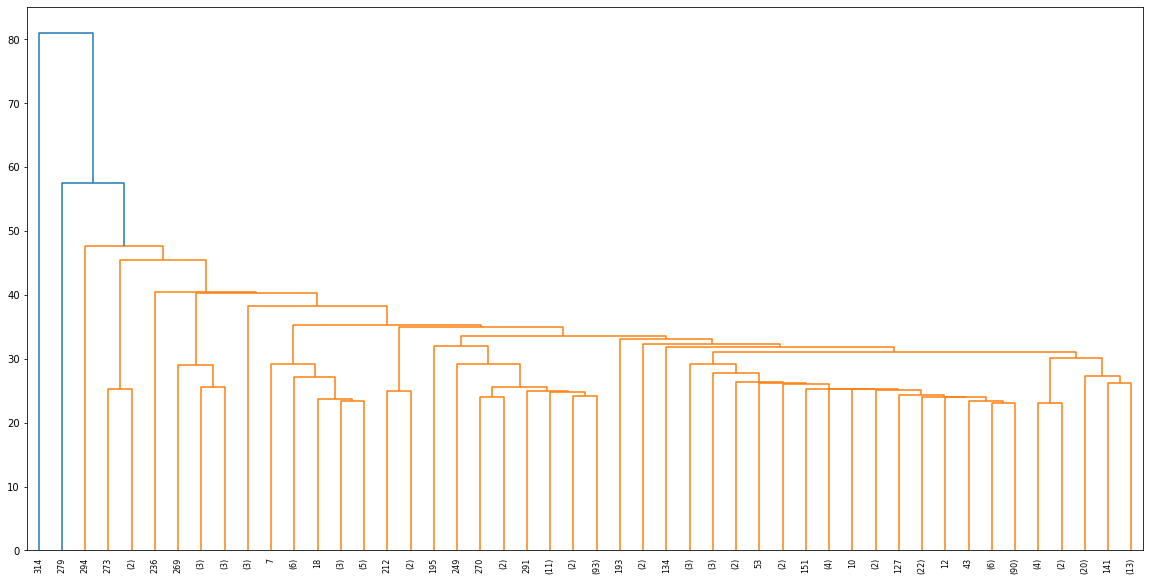

In [18]:
plt.figure(figsize=(20,10))
dn = hierarchy.dendrogram(linkage_matrix,truncate_mode='lastp',p=48)

### distance_threshold

In [19]:
model = AgglomerativeClustering(n_clusters=None,distance_threshold=2)

In [20]:
cluster_labels = model.fit_predict(scaled_X)

In [21]:
cluster_labels

array([27, 17,  0, 17,  9, 38,  0,  1, 26, 10,  0,  0,  8, 21,  1,  5, 22,
       11, 23, 28,  9, 26,  2, 29, 33,  1,  8, 21, 35,  9, 31, 13,  1, 11,
        8, 19, 27, 15, 15,  2, 26, 21,  5,  0,  1, 34, 16, 31, 29, 10, 35,
       19,  6, 14, 22,  1, 30, 23, 24,  1,  9, 35,  1,  9,  7, 35, 11, 10,
       32,  1, 29, 27, 16,  7,  4, 31, 17, 19,  3,  5,  7,  3,  3, 10, 16,
       21, 11, 29,  7, 17, 21,  4, 16,  0, 11, 13,  1, 33,  0,  7, 10, 16,
       26,  6, 11, 33,  4, 25, 36,  0,  5, 10,  3, 11, 21,  3,  1,  1, 10,
       18,  1, 25, 11, 29,  3,  3, 18,  1, 21,  5,  1,  4, 11,  1,  1, 14,
       11,  5, 26,  7, 24, 34, 28,  5, 20, 11,  1, 14,  1, 15, 17, 28,  7,
       13, 13, 35, 17, 11,  8, 31, 27,  2,  1, 10,  6, 13, 23,  7,  1, 12,
       12, 16, 14, 21,  0, 17, 12, 13, 17, 21, 12, 28,  6,  3, 27,  5, 11,
        9,  0,  1, 36,  4,  2,  8, 30, 29, 12,  6, 30, 14,  0, 16, 10, 27,
       11,  4,  4,  4, 26, 30, 28, 28,  8,  1, 34, 33, 27, 20,  0,  0, 16,
       17, 20, 16, 16, 31

In [22]:
np.unique(cluster_labels)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38], dtype=int64)

### Linkage Matrix

In [23]:
linkage_matrix = hierarchy.linkage(model.children_)

In [24]:
linkage_matrix

array([[317.        , 319.        ,   1.41421356,   2.        ],
       [  9.        , 208.        ,   2.23606798,   2.        ],
       [ 29.        ,  33.        ,   2.23606798,   2.        ],
       ...,
       [294.        , 659.        ,  47.63402146, 330.        ],
       [279.        , 660.        ,  57.48912941, 331.        ],
       [314.        , 661.        ,  81.0246876 , 332.        ]])

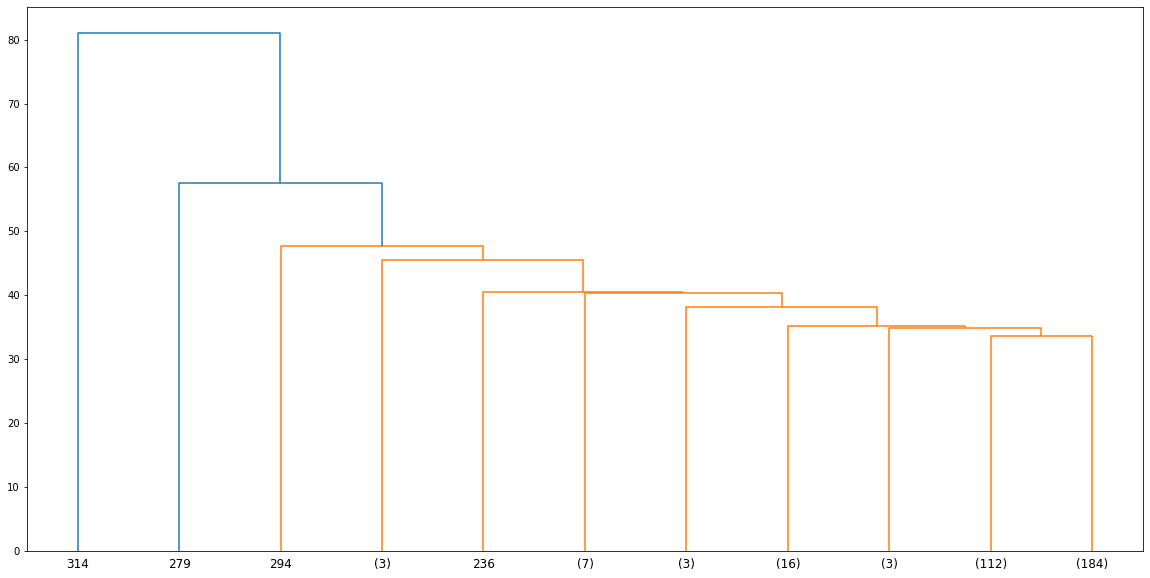

In [25]:
plt.figure(figsize=(20,10))
dn = hierarchy.dendrogram(linkage_matrix,truncate_mode='lastp',p=11)

## Model Implementation

In [26]:
model = AgglomerativeClustering(n_clusters=4)
model.fit(scaled_X)

AgglomerativeClustering(n_clusters=4)

In [27]:
model.labels_

array([0, 2, 0, 2, 3, 1, 0, 0, 0, 2, 0, 0, 1, 2, 0, 2, 3, 0, 2, 3, 3, 0,
       1, 0, 2, 0, 1, 2, 1, 3, 3, 0, 0, 0, 1, 3, 0, 1, 1, 1, 0, 2, 2, 0,
       0, 1, 1, 3, 0, 2, 1, 3, 1, 0, 3, 0, 1, 2, 1, 0, 3, 1, 0, 3, 1, 1,
       0, 2, 1, 0, 0, 0, 1, 1, 1, 3, 2, 3, 3, 2, 1, 3, 3, 2, 1, 2, 0, 0,
       1, 2, 2, 1, 1, 0, 0, 0, 0, 2, 0, 1, 2, 1, 0, 1, 0, 2, 1, 3, 0, 0,
       2, 2, 3, 0, 2, 3, 0, 0, 2, 1, 0, 3, 0, 0, 3, 3, 1, 0, 2, 2, 0, 1,
       0, 0, 0, 0, 0, 2, 0, 1, 1, 1, 3, 2, 1, 0, 0, 0, 0, 1, 2, 3, 1, 0,
       0, 1, 2, 0, 1, 3, 0, 1, 0, 2, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2, 0, 2,
       2, 0, 2, 2, 2, 3, 1, 3, 0, 2, 0, 3, 0, 0, 0, 1, 1, 1, 1, 0, 2, 1,
       1, 0, 0, 1, 2, 0, 0, 1, 1, 1, 0, 1, 3, 3, 1, 0, 1, 2, 0, 1, 0, 0,
       1, 2, 1, 1, 1, 3, 3, 0, 0, 2, 2, 1, 2, 0, 1, 0, 1, 1, 3, 1, 3, 3,
       2, 2, 2, 0, 1, 0, 1, 2, 3, 0, 1, 1, 1, 3, 2, 0, 1, 0, 1, 1, 3, 1,
       2, 1, 3, 1, 0, 1, 2, 0, 1, 1, 3, 0, 0, 1, 0, 3, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 2, 3, 2, 0, 0, 2, 0, 1, 2, 0, 1,

In [28]:
df_pen['clusters=4'] = model.labels_

In [29]:
X['clusters=4'] = model.labels_

### Correlacion con variables

In [30]:
X.corr()['clusters=4'].sort_values()

species_Gentoo      -0.799385
body_mass_g         -0.654077
flipper_length_mm   -0.646324
bill_length_mm      -0.293428
sex_Male            -0.015360
island_Dream         0.307868
species_Chinstrap    0.418824
bill_depth_mm        0.673234
island_Torgersen     0.720038
clusters=4           1.000000
Name: clusters=4, dtype: float64

In [31]:
correlacion_absoluta = np.abs(X.corr()['clusters=4'].sort_values()[:-1]).sort_values().reset_index()

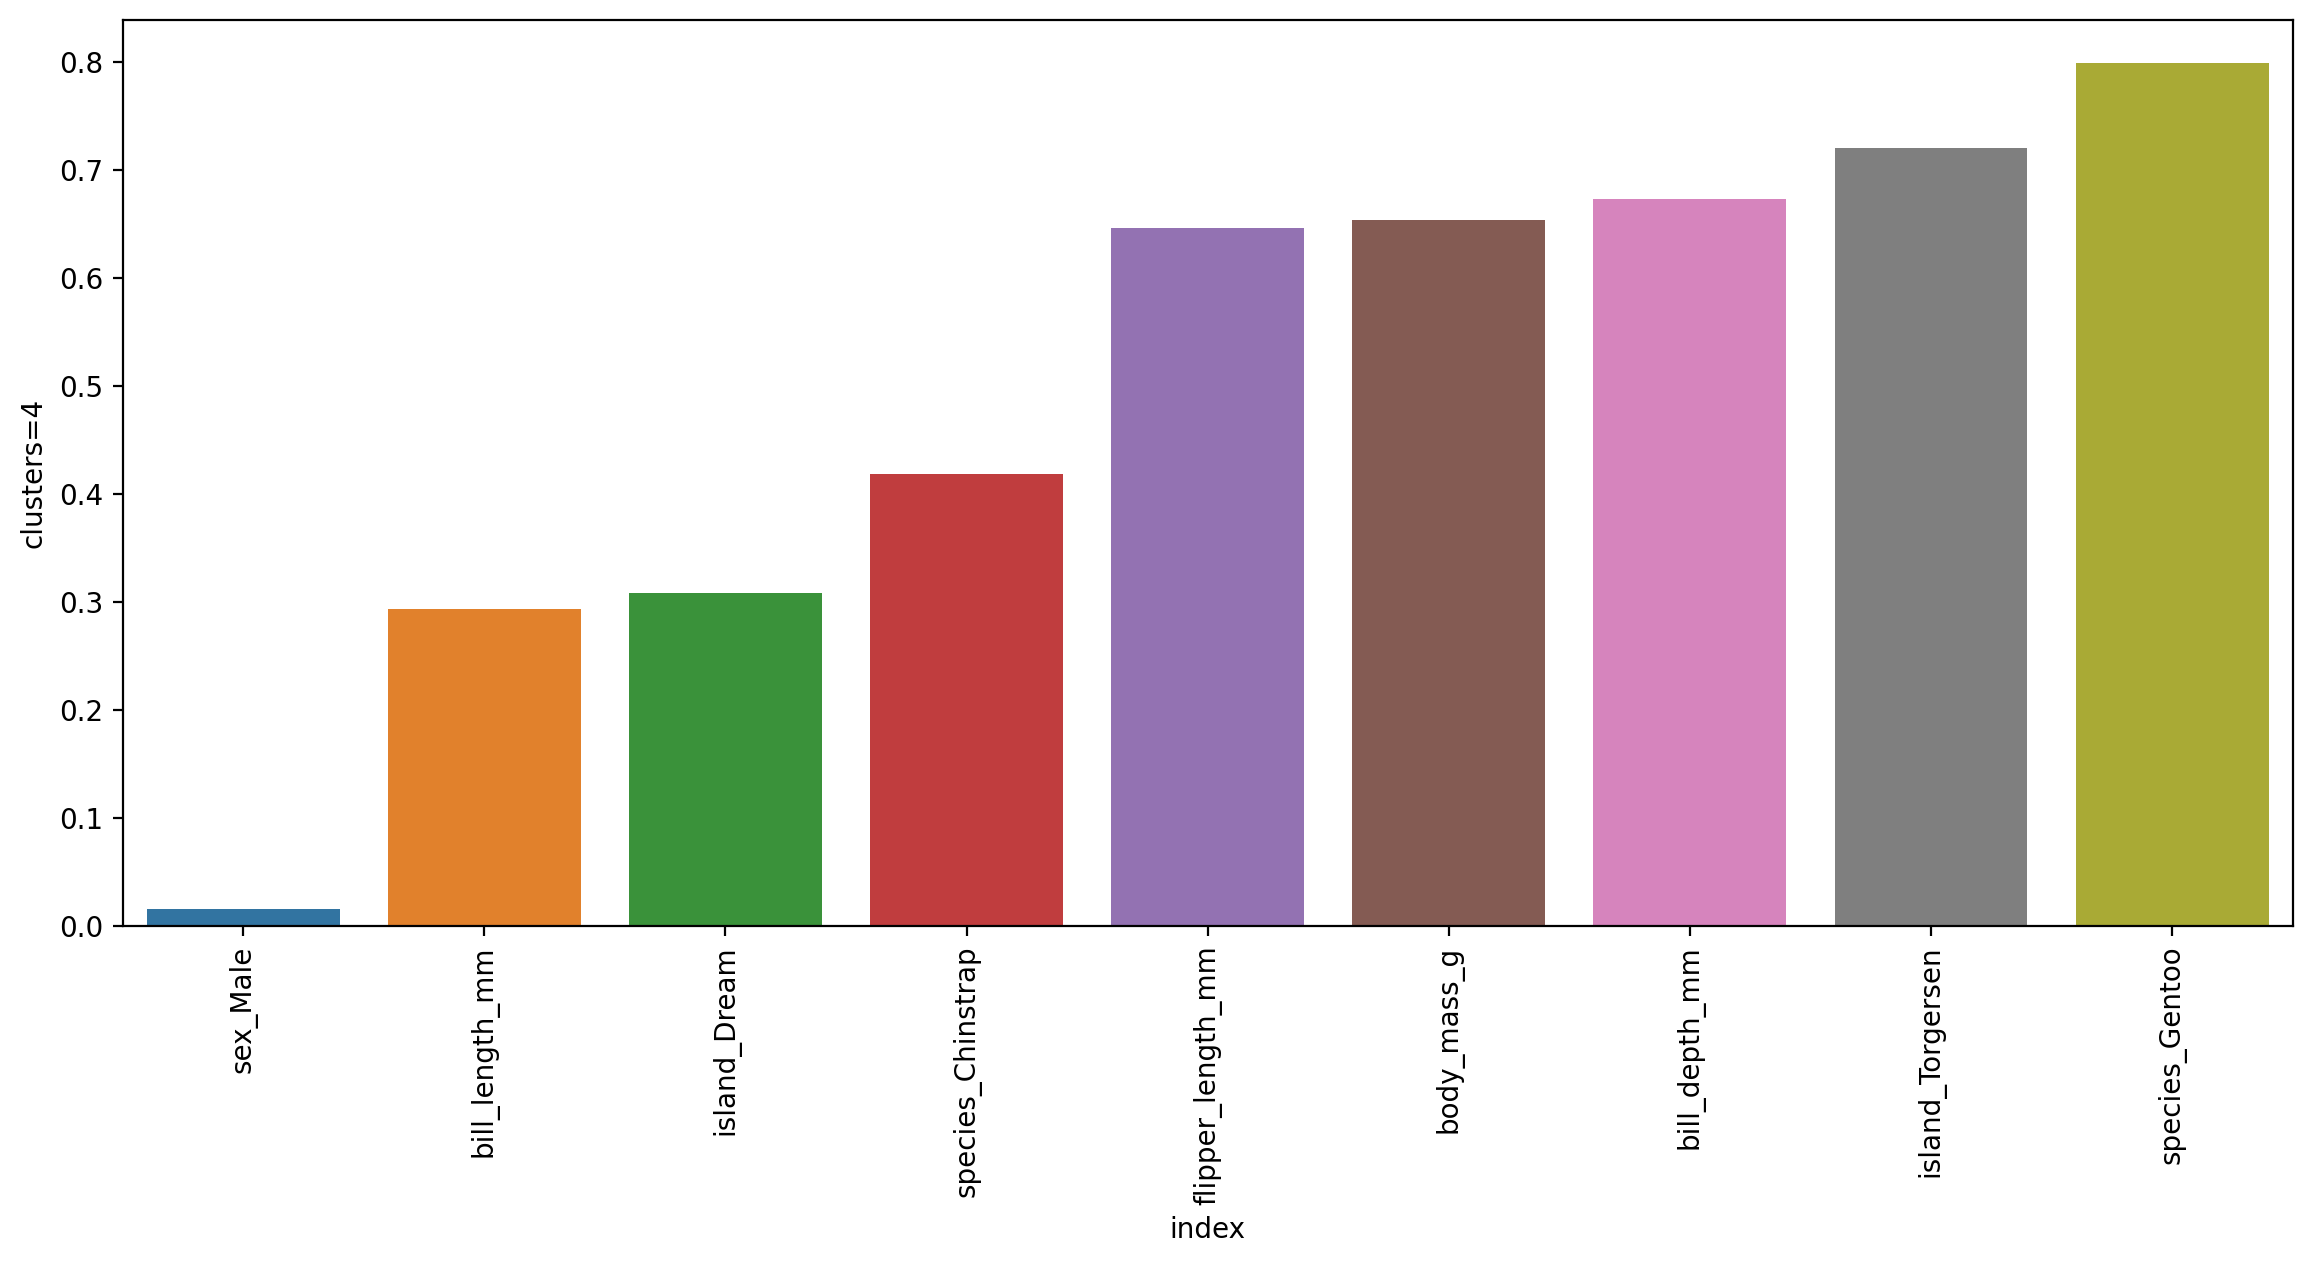

In [32]:
plt.figure(figsize=(14,6),dpi=200)
sns.barplot(data = correlacion_absoluta,x='index',y='clusters=4')

plt.xticks(rotation=90);